In [7]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [10]:
##################Extract Output from Output file#########################
n_samples=50#0-49
n_pow=81#0-80

file1 = open("POWER","r+")
Out=file1.read().split()
	
# Number of rows = 50 (ie, number of Samples), each column belongs to a different Samples]
# so, all the rows of a column is my Sample space
CLASS0=[]
CLASS1=[]
i=0
for i in range(n_samples):
	s="CLASS0_SAMPLE"+str(i)
	m=Out.index(s)
	Out=Out[m+1:]
	tem=[]
	for x in range(n_pow):
		s="*POW"+str(x)
		m=Out.index(s)
		tem.append(Out[m+2])
	CLASS0.append(tem)

	s="CLASS1_SAMPLE"+str(i)
	Out=Out[m+1:]
	m=Out.index(s)
	Out=Out[m+1:]
	tem=[]
	for x in range(n_pow):
		s="*POW"+str(x)
		m=Out.index(s)
		tem.append(Out[m+2])
	CLASS1.append(tem)
Samples_c0=[]
Samples_c1=[]
for x in range(len(CLASS0[0])):
	temp0=[]
	temp1=[]
	for i in range(len(CLASS0)):
		temp0.append(float(CLASS0[i][x]))
		temp1.append(float(CLASS1[i][x]))
	Samples_c0.append(temp0)
	Samples_c1.append(temp1)
#########################################################

In [50]:
from statsmodels.nonparametric.kde import kernel_switch
list(kernel_switch.keys())

['gau', 'epa', 'uni', 'tri', 'biw', 'triw', 'cos', 'cos2']

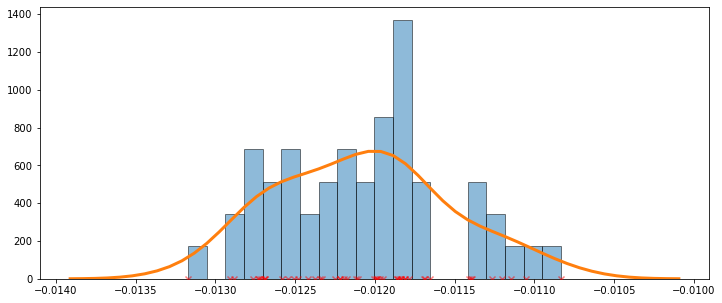

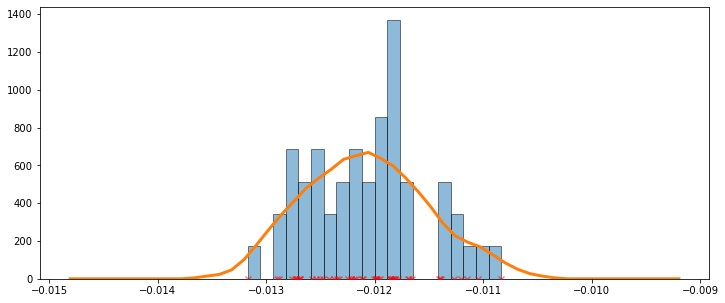

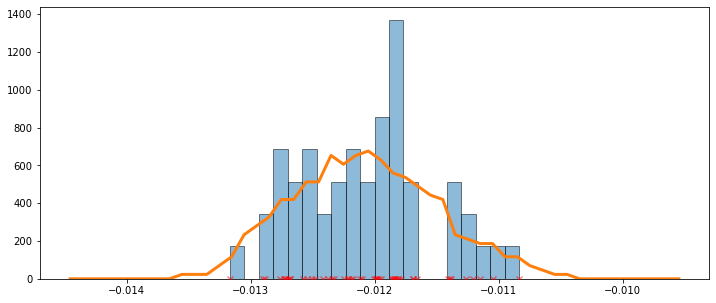

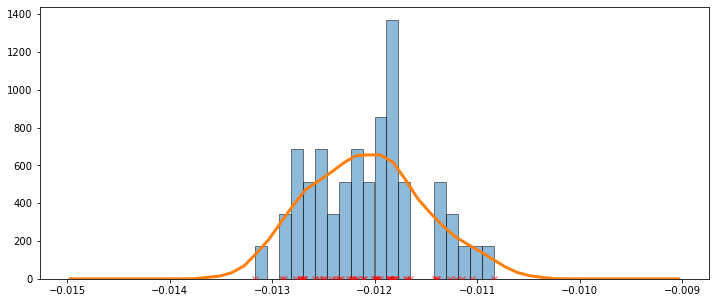

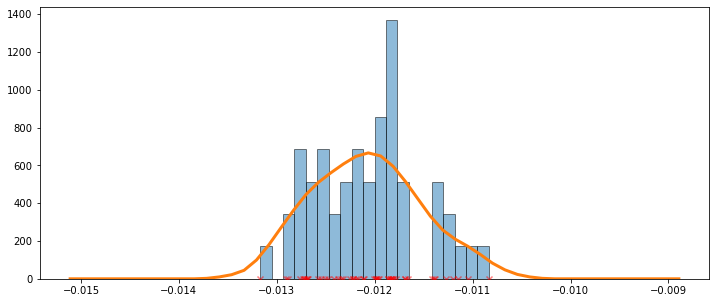

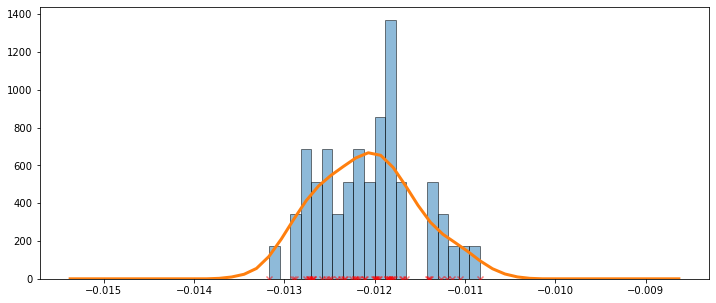

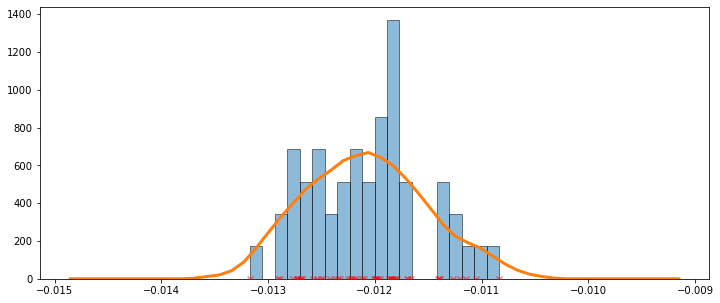

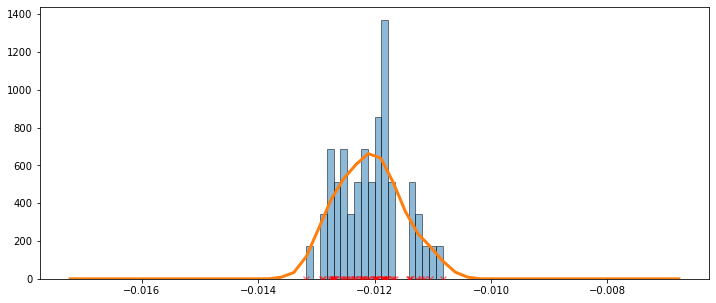

In [68]:
for i in range(len(list(kernel_switch.keys()))):
    obs_dist=Samples_c0[10]
    kde = sm.nonparametric.KDEUnivariate(obs_dist)

    X=list(kernel_switch.keys())
    kde.fit(kernel=X[i],fft=False) # Estimate the densities

    # ####################PLOT########################################
    # fig = plt.figure(figsize=(12, 5))
    # ax = fig.add_subplot(111)

    # # Scatter plot of data samples and histogram
    # ax.scatter(obs_dist, np.abs(np.random.randn(len(obs_dist))),
    #             zorder=15, color='red', marker='x', alpha=0.5, label='Samples')
    # lines = ax.hist(obs_dist, bins=20, edgecolor='k', label='Histogram')
    # ax.legend(loc='best')
    # ax.grid(True, zorder=-5)
    ####################PLOT########################################






    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot(111)

    # Plot the histrogram
    ax.hist(obs_dist, bins=20, density=True, label='Histogram from samples',
            zorder=5, edgecolor='k', alpha=0.5)

    # Plot the KDE as fitted using the default arguments
    x=ax.plot(kde.support, kde.density, lw=3, label='KDE from samples', zorder=10)


    # Plot the samples
    ax.scatter(obs_dist, np.abs(np.random.randn(len(obs_dist)))/40,
               marker='x', color='red', zorder=20, label='Samples', alpha=0.5)


['gau', 'epa', 'uni', 'tri', 'biw', 'triw', 'cos', 'cos2']